## <H3>프로젝트 개요</H3>
<H4>퇴직을 촉발하는 주요요인 발굴</H4>
<H3>문제 정의</H3>
주요 요인과 퇴직 관계 분석 및 업무 방해 요소 조사

1. 집과의 거리(DistanceFromHome)
2. 월 소득(MonthlyIncome)
3. 업무환경에 대한 만족도(EnvironmentSatisfaction)
4. 업무 성과(PerformanceRating)

<script>
var code_show=false; //true로 설정하면 코드가 보이고, false로 설정하면 코드가 숨겨집니다.
function code_toggle() {
 if (code_show){
  $('div.input').hide();
 } else {
  $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="코드 표시/숨기기"></form>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

warnings.filterwarnings(action='ignore')

data = pd.read_csv("C:/Users/user/Desktop/Ex-port/HR/HR_DATASET.csv")

'''변수값이 모두 같거나 분석에 필요가 없다고 느껴지는 항목은 제외하였습니다'''
##필요없는 열 삭제
data = data.drop(['Over18','StandardHours','EmployeeNumber','EmployeeCount'],axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


## <H3>데이터 전처리</H3>

상관분석을 하기 위해서는 범주형 데이터와 변수값이 문자열인 값에 대한 처리가 필요하다.  
  
순서가 중요한 범주변수는 LabelEncoding, 순서가 중요하지 않은 범주변수는 OneHotEncoding 처리
  
- LabelEncoding =  Education, JobLevel
- OneHotEncoding = Attrition, Department, BusinessTravel,EducationField, Gender, JobRole, MaritalStatus
- OverTime변수는 Yes:1, No:0으로 변환

In [2]:
'''상관분석용 데이터 전처리'''
from sklearn.preprocessing import LabelEncoder
data_corr = data
data_corr['OverTime'] = data_corr['OverTime'].replace({'Yes': 1, 'No': 0})

Le = LabelEncoder()
columns_to_encode = ['Education', 'JobLevel']
for column in columns_to_encode:
    data_corr[column] = Le.fit_transform(data[column])
    
data_corr= pd.get_dummies(data_corr, columns = ['Attrition','Department','BusinessTravel','EducationField','Gender','JobRole','MaritalStatus'])
data_corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,1,2,94,3,1,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,0,3,61,2,1,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,1,4,92,2,0,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,3,4,56,3,0,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,0,1,40,3,0,2,3468,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,3,41,4,1,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,0,4,42,2,2,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,2,2,87,4,1,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,2,4,63,2,1,2,5390,...,0,0,0,0,0,1,0,0,1,0


## <H3>1. 주요요인 분석</H3>

분석 방법
1. 각 항목에 대한 분석 후 가설 설정
1. 상관분석을 통해 주요요인의 변수간 상관관계 확인
2. 가설과 데이터 분석 결과 비교

### <H3>1.1.1 집과의 거리(DistanceFromHome)

In [3]:
# '집과의 거리(DistanceFromHome)'와 다른 모든 변수 간의 상관관계 계산
correlations_DFH = data_corr.corr(method = 'spearman')['DistanceFromHome']

# 상관관계가 0.5 이상 또는 -0.5 이하인 변수들을 필터링
significant_correlations_DFH = correlations_DFH[(correlations_DFH >= 0.5) | (correlations_DFH <= -0.5)]

# 결과 출력
print("DistanceFromHome와 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:")
print(significant_correlations_DFH)

DistanceFromHome와 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:
DistanceFromHome    1.0
Name: DistanceFromHome, dtype: float64


<H4>집과의 거리와 수치상 강한 상관관계를 가지는 변수는 찾지 못하였다.

### <H3>1.1.2 기초통계량

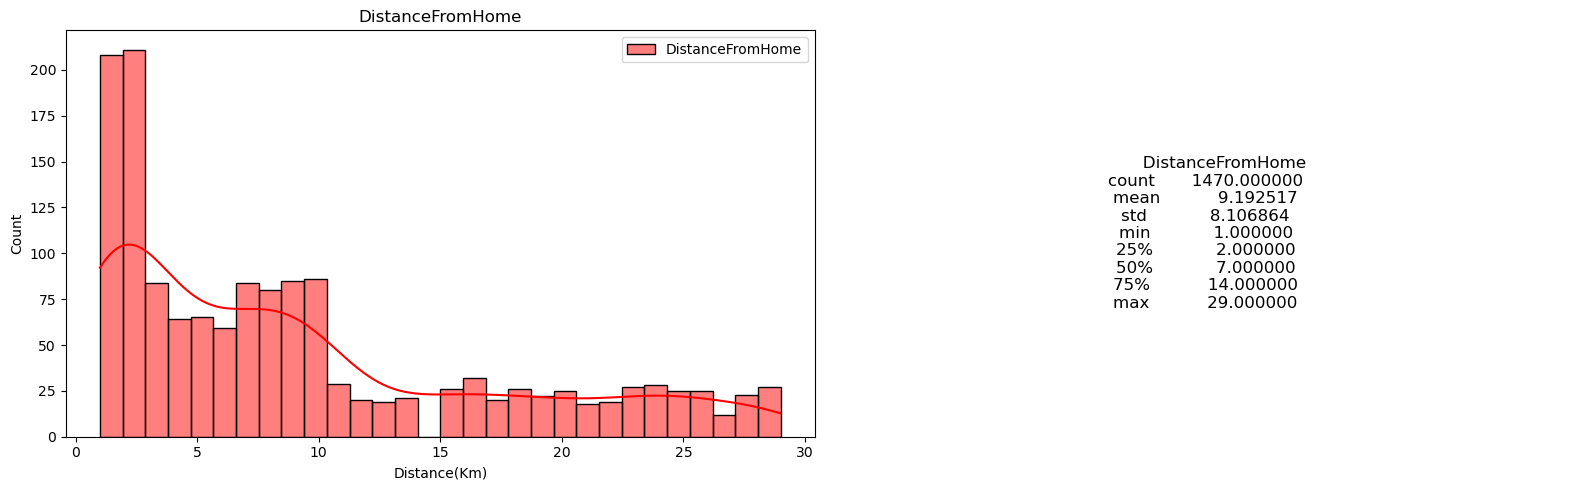

In [4]:
'''집과의 거리 기초통계량'''
fig, ax = plt.subplots(1, 2, figsize=(16, 5 )) # 2행 1열의 subplot 생성

sns.histplot(data['DistanceFromHome'], color='red', label='DistanceFromHome', kde=True, bins=30, common_norm=False, ax=ax[0])
ax[0].set_title('DistanceFromHome') # 히스토그램 제목 설정
ax[0].set_xlabel('Distance(Km)') # x축 라벨 설정
ax[0].legend() # 범례 표시

ax[1].axis('off') # 두 번째 subplot의 축을 숨깁니다.
description = data['DistanceFromHome'].describe().to_frame() # 기술통계를 데이터프레임으로 변환
description_text = description.to_string() # 데이터프레임을 문자열로 변환
ax[1].text(0.5, 0.5, description_text, fontsize=12, va='center', ha='center') # 기술통계를 텍스트로 subplot에 추가

plt.tight_layout() # subplot 간의 간격을 자동으로 조정
plt.show()

평균적으로 10km 반경내에 거주했으며 최단거리는 1km, 최장거리는 30km이다.

30km 면 강남-수도권 정도의 거리를 가지므로 보통의 통근시간이 1~2시간 내외일 것이다.  
그리고 상위 75%의 직원의 통근 거리가 14km정도로 나타났는데,
서울경제에서 2023.12.21일 기준으로 조사한 바에 따르면 서울 소재 직장인의 평균 통근 거리가 18.4km인것으로 나타나  
대부분의 직원들은 평균적인 집과의 거리를 가지고 있는 것으로 알 수 있다.              -출처 https://www.sedaily.com/NewsView/29YLJ5OUUC


그렇다면, 데이터를 두 구간으로 나누어 평균적인 통근 거리가 긴 사람들의 특징에 대해 알아보도록 한다.

- 전체 데이터
- 하위 25% 데이터(통근 거리가 긴)

### <H3>1.1.3 집과의 거리가 멀 경우(가설)</H3>

- 나이가 적을 것(독립하지 않았음을 의미)  
- 퇴사율이 높을 것  
- 업무 환경에 대한 만족도가 낮을것

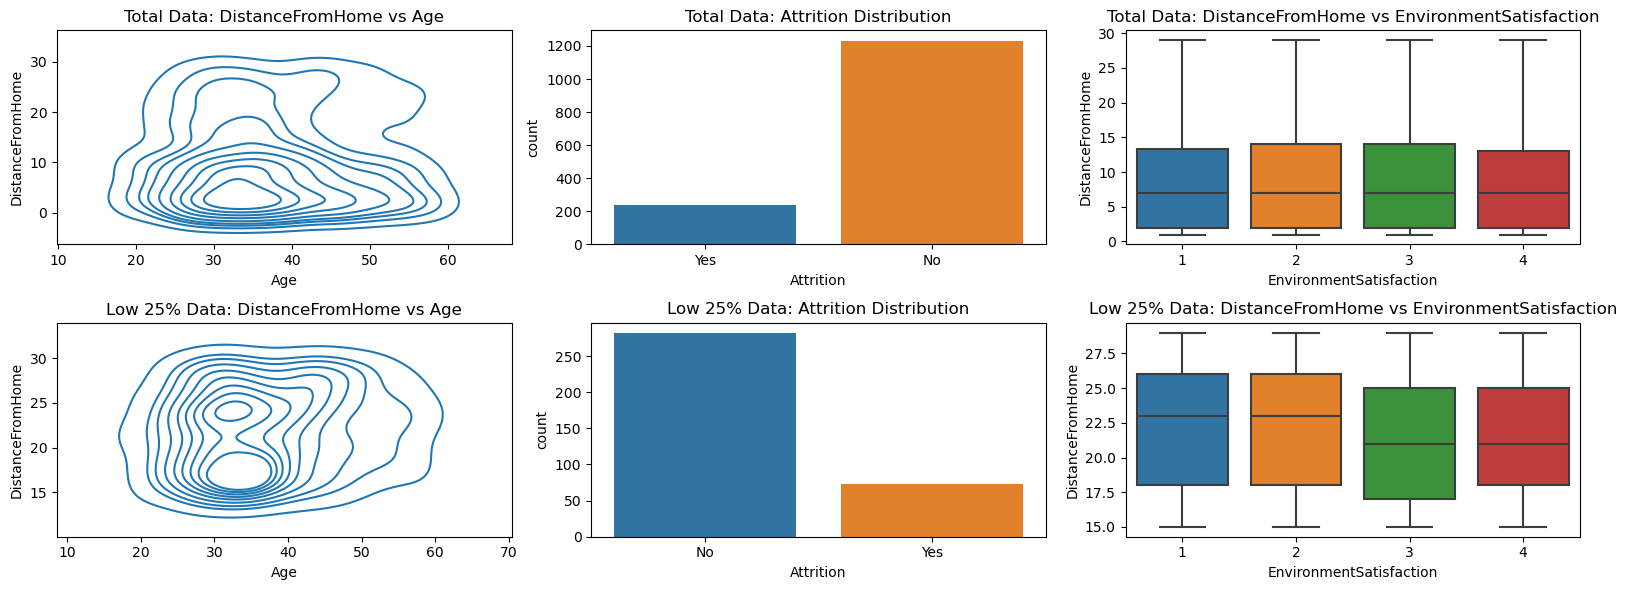

In [5]:
# DistanceFromHome 상위 25% 임계값 찾기
threshold = data['DistanceFromHome'].quantile(0.75)

# 상위 25%에 해당하는 데이터 필터링
top_25_data = data[data['DistanceFromHome'] > threshold]

fig, ax = plt.subplots(2, 3, figsize=(16,6))  # 2행 3열의 subplot 생성

# 전체 데이터와 상위 25% 데이터에 대한 DistanceFromHome과 Age의 비교
sns.kdeplot(y='DistanceFromHome', x='Age', data=data, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Total Data: DistanceFromHome vs Age')
sns.kdeplot(y='DistanceFromHome', x='Age', data=top_25_data, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Low 25% Data: DistanceFromHome vs Age')

# 전체 데이터와 상위 25% 데이터에 대한 Attrition 분포 비교
sns.countplot(x='Attrition', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Total Data: Attrition Distribution')
sns.countplot(x='Attrition', data=top_25_data, ax=ax[1, 1])
ax[1, 1].set_title('Low 25% Data: Attrition Distribution')

# 전체 데이터와 상위 25% 데이터에 대한 DistanceFromHome과 EnvironmentSatisfaction의 비교
sns.boxplot(x='EnvironmentSatisfaction', y='DistanceFromHome', data=data, ax=ax[0, 2])
ax[0, 2].set_title('Total Data: DistanceFromHome vs EnvironmentSatisfaction')
sns.boxplot(x='EnvironmentSatisfaction', y='DistanceFromHome', data=top_25_data, ax=ax[1, 2])
ax[1, 2].set_title('Low 25% Data: DistanceFromHome vs EnvironmentSatisfaction')

plt.tight_layout()
plt.show()

그래프를 살펴보면, 통근 거리가 긴 하위 25% 직원이 전체 직원보다 퇴사율에 대한 비율이 높은것을 알 수 있다.  
또한, 업무 만족도에 경우 하위 25% 직원의 그래프에서 업무만족도가 낮다고(1,2) 평가한 직원의 meadian(중앙값)이 높다고(3,4)평가한 직원보다 높은것으로 보아  
집과의 거리는 퇴사율과 업무 만족도와의 유의미한 관계를 가지는 것으로 나타났다.
<H4> 즉, 집과의 거리(DistanceFromHome)이 길수록 퇴사율은 높으며 업무만족도가 낮음을 알 수 있다</H4>

## <H3> 1.2 월 소득(MonthlyIncome)

### 1.2.1 기초통계량

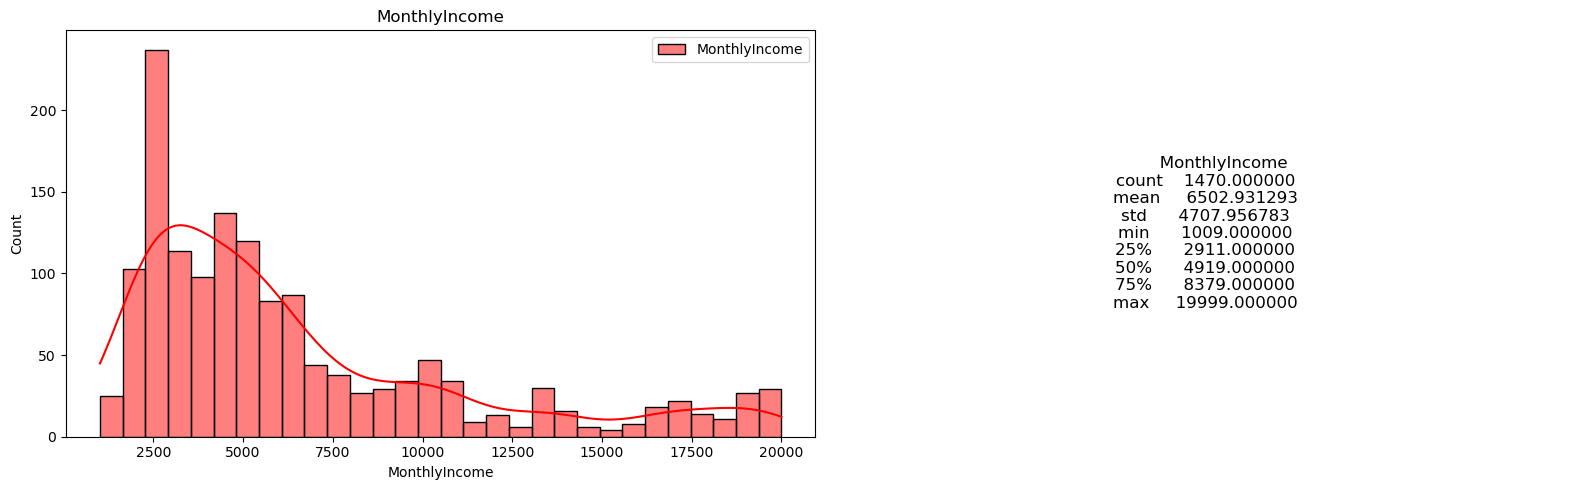

In [6]:
'''월 소득 기초통계량'''
fig, ax = plt.subplots(1, 2, figsize=(16, 5 )) # 2행 1열의 subplot 생성

sns.histplot(data['MonthlyIncome'], color='red', label='MonthlyIncome', kde=True, bins=30, common_norm=False, ax=ax[0])
ax[0].set_title('MonthlyIncome') # 히스토그램 제목 설정
ax[0].set_xlabel('MonthlyIncome') # x축 라벨 설정
ax[0].legend() # 범례 표시

ax[1].axis('off') # 두 번째 subplot의 축을 숨깁니다.
description = data['MonthlyIncome'].describe().to_frame() # 기술통계를 데이터프레임으로 변환
description_text = description.to_string() # 데이터프레임을 문자열로 변환
ax[1].text(0.5, 0.5, description_text, fontsize=12, va='center', ha='center') # 기술통계를 텍스트로 subplot에 추가

plt.tight_layout() # subplot 간의 간격을 자동으로 조정
plt.show()

평균적으로 6500정도의 월 소득을 받고 있는것으로 보인다.\
하지만 편차가 굉장히 큰 수준이며, 변수 특성상 수치 그대로 퇴사율을 분석해보기에는 오류가 있을 것이다.


### <H3>1.2.2 상관관계 분석</H3>

In [7]:
# '월소득(MonthlyIncome)'와 다른 모든 변수 간의 상관관계 계산
correlations_MI = data_corr.corr()['MonthlyIncome']

# 상관관계가 0.5 이상 또는 -0.5 이하인 변수들을 필터링
significant_correlations_MI = correlations_MI[(correlations_MI >= 0.5) | (correlations_MI <= -0.5)]

# 결과 출력
print("MonthlyIncomer과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:")
print(significant_correlations_MI)

MonthlyIncomer과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:
JobLevel             0.950300
MonthlyIncome        1.000000
TotalWorkingYears    0.772893
YearsAtCompany       0.514285
JobRole_Manager      0.619573
Name: MonthlyIncome, dtype: float64


<H4>상관관계를 분석 해 보았을떄</H4>  
  
월 소득(MonthlyIncome)이 높을 경우</H3>

- JobLevel(직업 수준) 이 높다
- TotalWorkingYears(경력 기간)이 높다
- YearsAtCompany(회사에서 일한 기간)이 높다  
- 특정 직업군(JobRole_Manager)은 고액을 월급여를 받고 있다.  

라는 결과를 얻을 수 있었다. 

상당히 평이한 결과이다.

직업 수준, 경력기간, 회사에서 일한 기간은 대부분 월 소득과 양의 상관관계를 가질 것이다.\
단순 월 소득 순으로 퇴사율을 분석하게 된다면 위 세가지가 포함된, 대부분 나이가 많고 경력이 오래된 사람들과 저년차들의 비교가 될 것이다.

비교적 저급여를 받는 직원과 그렇지 않은 직원의 퇴사율 비교를 하기위해\
나이대 별 상위 50프로와 하위 50프로의 월 소득을 가지고있는 사람들의 퇴사율을 분석해보았다.

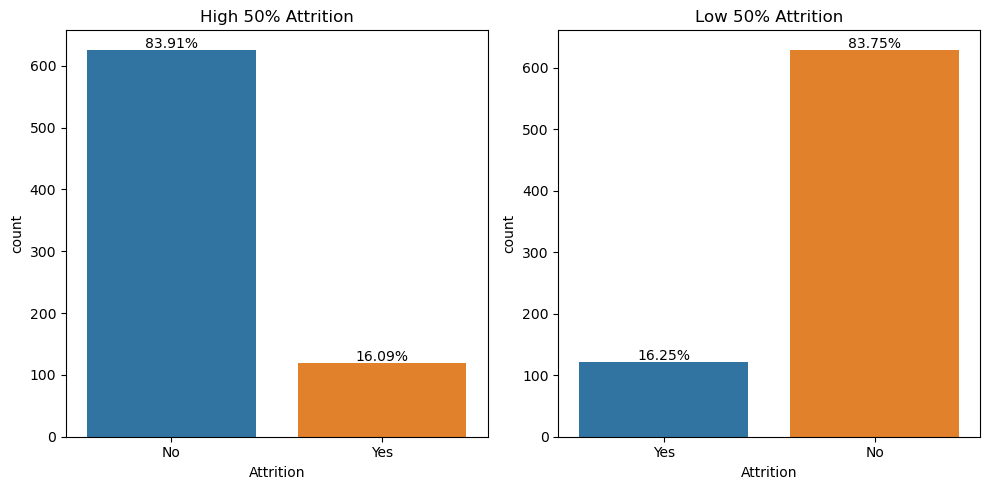

In [8]:
# 나이대 범주 생성 (18살부터 시작하여 5살 간격)
bins = list(range(18, data['Age'].max() + 5, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]  # 예: '18-22', '23-27', ...
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


high_50_percent_by_age_group = data.groupby('AgeGroup').apply(lambda x: x[x['HourlyRate'] >= x['HourlyRate'].quantile(0.5)])
bottom_50_percent_by_age_group = data.groupby('AgeGroup').apply(lambda x: x[x['HourlyRate'] <= x['HourlyRate'].quantile(0.5)])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 고성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=high_50_percent_by_age_group, x='Attrition', ax=axs[0])
axs[0].set_title('High 50% Attrition')
total_high = len(high_50_percent_by_age_group)  # 고성능자 집단의 전체 데이터 수
for p in axs[0].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_high), ha="center")

# 저성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=bottom_50_percent_by_age_group, x='Attrition', ax=axs[1])
axs[1].set_title('Low 50% Attrition')
total_low = len(bottom_50_percent_by_age_group)  # 저성능자 집단의 전체 데이터 수
for p in axs[1].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_low), ha="center")

plt.tight_layout()
plt.show()

월 소득(MontlyIncome)은 퇴사율에 크게 영향을 끼치지 않는다는 결과를 알 수 있었다.\
기준을 바꾸어, 상위 30프로의 직원과 하위 70%의 직원으로 범위를 바꾸어서 다시 분석해보았다

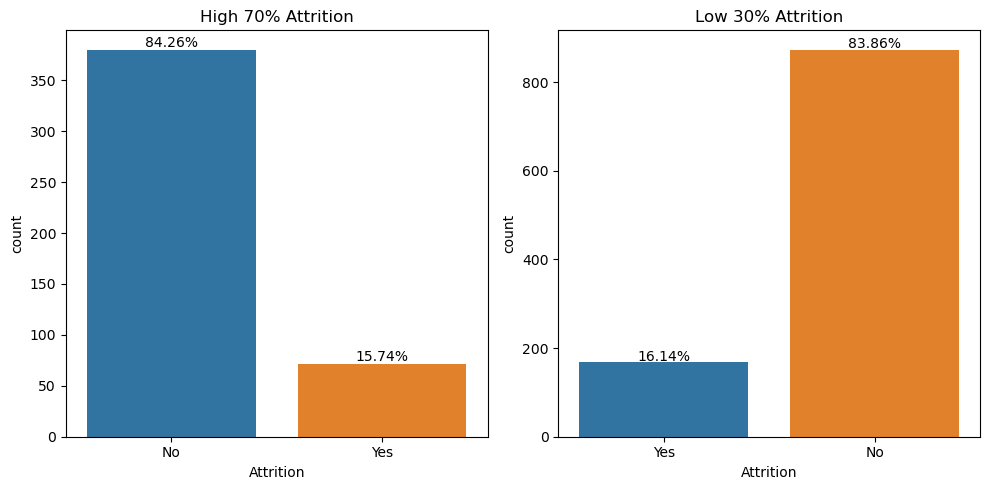

In [9]:
high_70_percent_by_age_group = data.groupby('AgeGroup').apply(lambda x: x[x['HourlyRate'] >= x['HourlyRate'].quantile(0.7)])
bottom_30_percent_by_age_group = data.groupby('AgeGroup').apply(lambda x: x[x['HourlyRate'] <= x['HourlyRate'].quantile(0.7)])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 고성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=high_70_percent_by_age_group, x='Attrition', ax=axs[0])
axs[0].set_title('High 70% Attrition')
total_high = len(high_70_percent_by_age_group)  # 고성능자 집단의 전체 데이터 수
for p in axs[0].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_high), ha="center")

# 저성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=bottom_30_percent_by_age_group, x='Attrition', ax=axs[1])
axs[1].set_title('Low 30% Attrition')
total_low = len(bottom_30_percent_by_age_group)  # 저성능자 집단의 전체 데이터 수
for p in axs[1].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_low), ha="center")

plt.tight_layout()
plt.show()

범위를 바꾸어 분석해보아도 별다른 비율의 차이를 보이지 않는다.\
퇴사를 결정짓는 요인으로는 돈보다는 다른 요인들이 크게 작용하는 것으로 보인다.

## <H3> 1.3 업무 환경에 대한 만족도(EnvironmentSatisfaction) 

### <H3>1.3.1 기초통계량

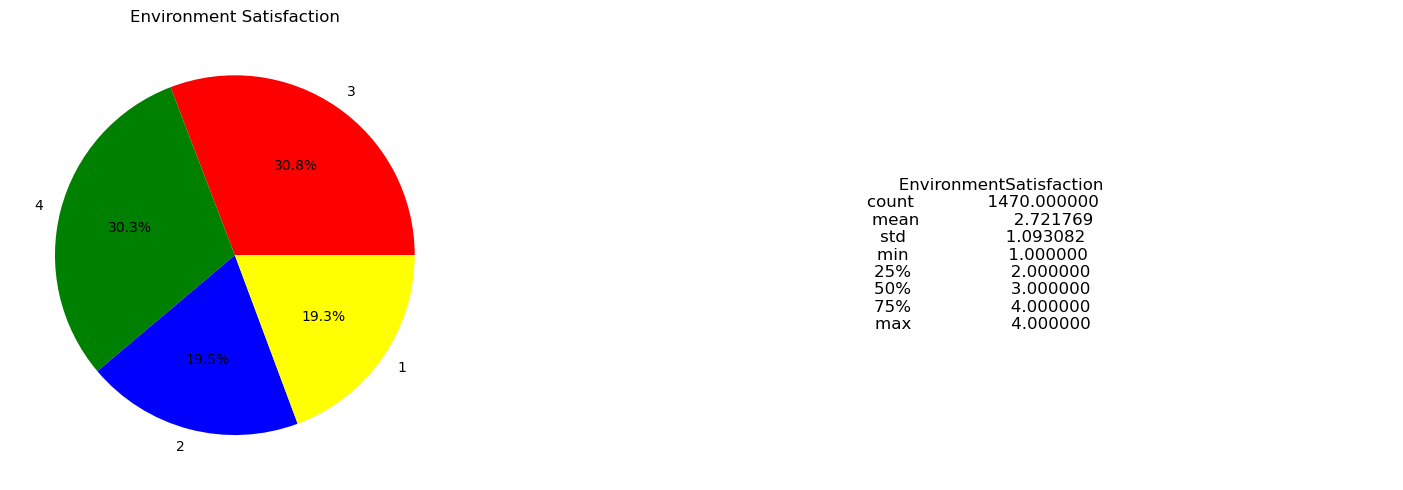

In [10]:
'''업무 환경에 대한 만족도 기초통계량'''
fig, ax = plt.subplots(1, 2, figsize=(16, 5 )) # 2행 1열의 subplot 생성

# 첫 번째 서브플롯에 파이 차트 그리기
env_satisfaction_counts = data['EnvironmentSatisfaction'].value_counts()
ax[0].pie(env_satisfaction_counts, labels=env_satisfaction_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[0].set_title('Environment Satisfaction')

ax[1].axis('off') # 두 번째 subplot의 축을 숨깁니다.
description = data['EnvironmentSatisfaction'].describe().to_frame() # 기술통계를 데이터프레임으로 변환
description_text = description.to_string() # 데이터프레임을 문자열로 변환
ax[1].text(0.5, 0.5, description_text, fontsize=12, va='center', ha='center') # 기술통계를 텍스트로 subplot에 추가

plt.tight_layout() # subplot 간의 간격을 자동으로 조정
plt.show()

만족도가 낮은(1,2) 직원의 비율이 약 40%로 상당히 높은것으로 나타났다.\
이들에 특성에 대한 분석이 필요해보인다.

### <H3>1.3.2 상관관계 분석

In [11]:
# '업무환경에 대한 만족도(EnvironmentSatisfaction))'와 다른 모든 변수 간의 상관관계 계산
correlations_ESF = data_corr.corr(method = 'spearman')['EnvironmentSatisfaction']

# 상관관계가 0.5 이상 또는 -0.5 이하인 변수들을 필터링
significant_correlations_ESF = correlations_ESF[(correlations_ESF >= 0.5) | (correlations_ESF <= -0.5)]

# 결과 출력
print("EnvironmentSatisfaction과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:")
print(significant_correlations_ESF)

EnvironmentSatisfaction과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:
EnvironmentSatisfaction    1.0
Name: EnvironmentSatisfaction, dtype: float64


업무환경에 대한 만족도(EnvironmentSatisfaction)또한 수치상으로 큰 상관관계를 가지는 요인은 찾지 못하였다.
그렇다면 만족도가 낮은(1,2) 직원들과 아닌 직원과의 퇴사율의 차이를 분석해보았다.

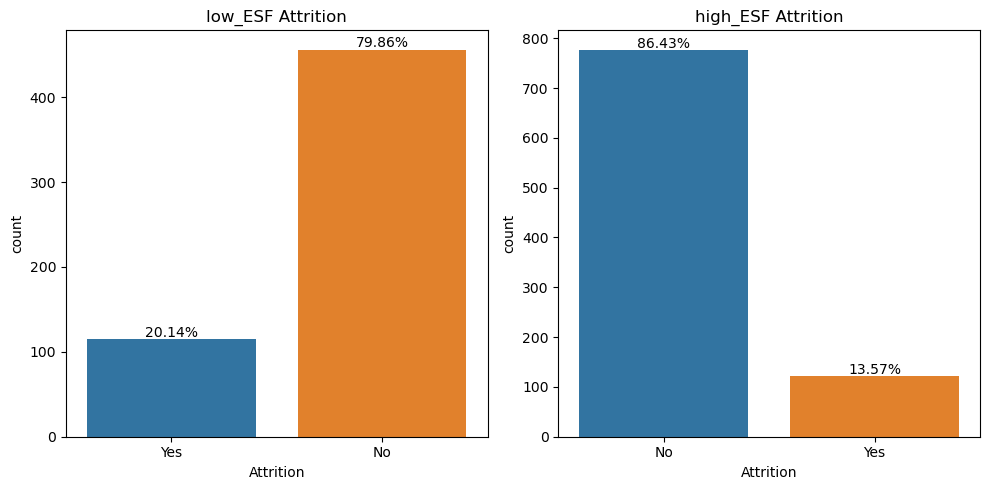

In [12]:
# '업무환경에 대한 만족도(EnvironmentSatisfaction))가 낮은 직원원'와 다른 모든 변수 간의 상관관계 계산
low_ESF = data[(data['EnvironmentSatisfaction'] <= 2)]
high_ESF = data[(data['EnvironmentSatisfaction'] >= 3)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 고성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=low_ESF, x='Attrition', ax=axs[0])
axs[0].set_title('low_ESF Attrition')
total_high = len(low_ESF)  # 고성능자 집단의 전체 데이터 수
for p in axs[0].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_high), ha="center")

# 저성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=high_ESF, x='Attrition', ax=axs[1])
axs[1].set_title('high_ESF Attrition')
total_low = len(high_ESF)  # 저성능자 집단의 전체 데이터 수
for p in axs[1].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_low), ha="center")

plt.tight_layout()
plt.show()

업무 환경에 대한 만족도(EnvironmentSatisfaction)가 낮을 경우, 퇴사율이 약 6.6% 높은것으로 보인다.\
유의미한 차이가 보이므로, 업무환경에 대한 만족도(EnvironmentSatisfaction)와 관계를 가질 법 한 요인들에 대해서도 추가적으로 분석해보았다.

### <H3>1.3.3 가설 설정</H3>

업무환경에 대한 만족도(EnvironmentSatisfaction)가 낮을 경우

- 출장의 빈도가 높을것이다
- 특정 업무 분야에서 낮게 나타날 것이다
- 집과의 거리가 멀 것이다.
- 대인관계 만족도가 낮을것이다.

이 중 집과의 거리는 1.1.3에서 실제로 집과의 거리가 멀 수 록 업무관계 만족도가 낮은것을 알 수 있었으니 나머지 3가지요인에 대해서 분석해보았다.

<H3>업무 분야(Department)

Text(0.5, 1.0, 'Environment Satisfaction_HR')

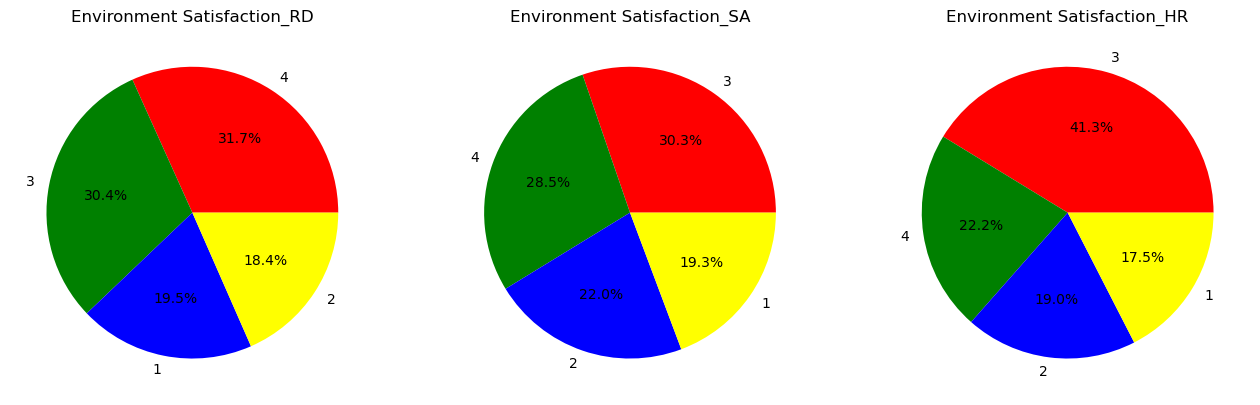

In [13]:
'''업무 분야별 만족도'''
low_ESF_RD = data[(data['Department'] == 'Research & Development')]
low_ESF_SA = data[(data['Department'] == 'Sales')]
low_ESF_HR = data[(data['Department'] == 'Human Resources')]

#업무 분야
fig, ax = plt.subplots(1, 3, figsize=(16, 5)) 

ESF_satisfaction_counts_RD = low_ESF_RD['EnvironmentSatisfaction'].value_counts()
ax[0].pie(ESF_satisfaction_counts_RD, labels=ESF_satisfaction_counts_RD.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[0].set_title('Environment Satisfaction_RD')

ESF_satisfaction_counts_SA = low_ESF_SA['EnvironmentSatisfaction'].value_counts()
ax[1].pie(ESF_satisfaction_counts_SA, labels=ESF_satisfaction_counts_SA.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[1].set_title('Environment Satisfaction_SA')

ESF_satisfaction_counts_HR = low_ESF_HR['EnvironmentSatisfaction'].value_counts()
ax[2].pie(ESF_satisfaction_counts_HR, labels=ESF_satisfaction_counts_HR.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[2].set_title('Environment Satisfaction_HR')

특정 분야와 업무관계 만족도와는 관계를 가지지 않는것으로 보인다.

<H3>출장 빈도

Text(0.5, 1.0, 'Non-travel')

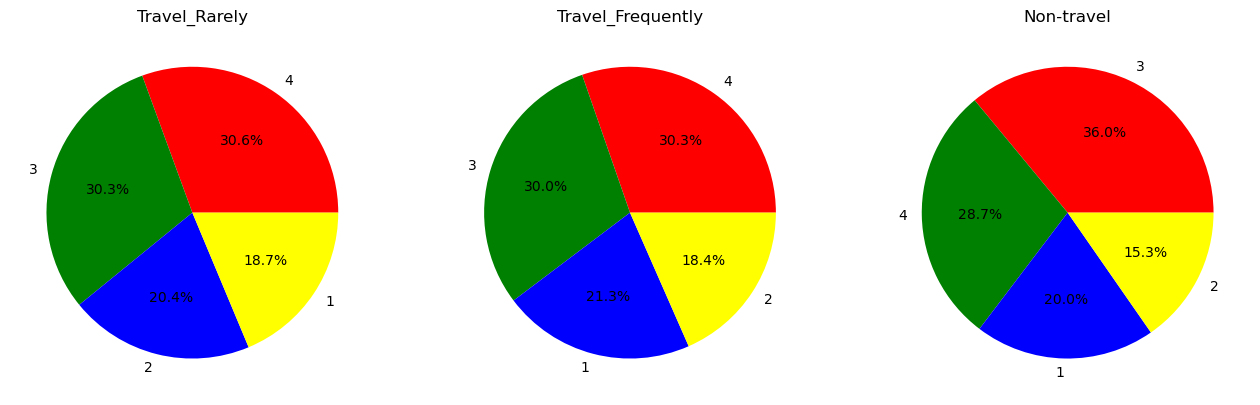

In [14]:
'''출장 빈도별별'''
TR = data[(data['BusinessTravel'] == 'Travel_Rarely')]
TF = data[(data['BusinessTravel'] == 'Travel_Frequently')]
NT = data[(data['BusinessTravel'] == 'Non-Travel')]

#업무 분야
fig, ax = plt.subplots(1, 3, figsize=(16, 5)) 

S_TR = TR['EnvironmentSatisfaction'].value_counts()
ax[0].pie(S_TR, labels=S_TR.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[0].set_title('Travel_Rarely')

S_TF = TF['EnvironmentSatisfaction'].value_counts()
ax[1].pie(S_TF, labels=S_TF.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[1].set_title('Travel_Frequently')

S_NT = NT['EnvironmentSatisfaction'].value_counts()
ax[2].pie(S_NT, labels=S_NT.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow'])
ax[2].set_title('Non-travel')

출장 빈도 또한 업무 만족도와 큰 관계를 가지지 않는다.\
다만, Non-Travel의 경우 업무 환경 만족도가 낮은(1,2)의 비율이 5%정도 낮은것으로 나타났다.\
출장을 가지 않을경우 업무 환경 만족도가 낮다는 재미있는 결과를 볼 수 있다.

<H3>대인관계 만족도

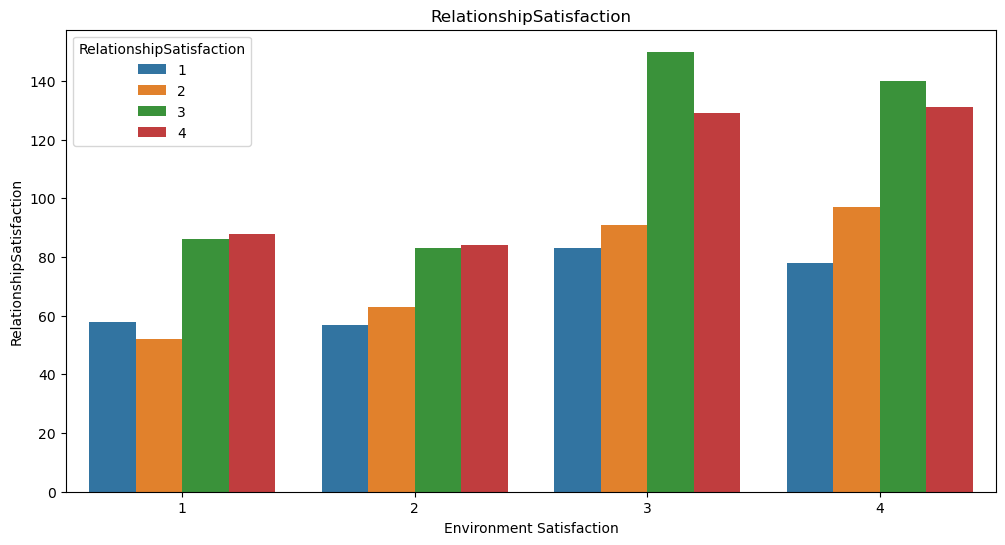

In [15]:
''' 대인관계 만족도별'''
plt.figure(figsize=(12, 6))

sns.countplot(x='EnvironmentSatisfaction', hue='RelationshipSatisfaction', data=data)
plt.title('RelationshipSatisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('RelationshipSatisfaction')

plt.show()

업무 만족도가 높은(3,4)의 경우, 대체로 대인관계 만족도가 높은(3,4)비율이 많다는 사실을 확인할 수 있다.\
<H3>즉, 업무환경에 대한 만족도가 높을수록 대인관계 만족도가 높다.</H3>

## <H3> 1.4 업무 성과(PerformanceRating)

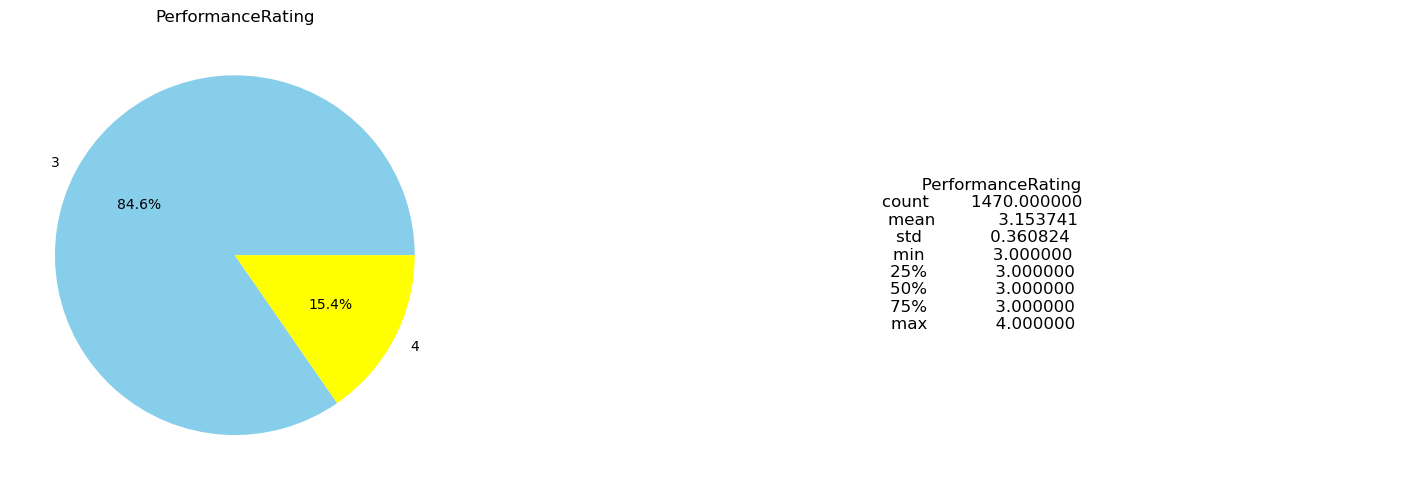

In [16]:
'''업무 성과 기초통계량'''
fig, ax = plt.subplots(1, 2, figsize=(16, 5 )) # 2행 1열의 subplot 생성

# 첫 번째 서브플롯에 파이 차트 그리기
env_satisfaction_counts = data['PerformanceRating'].value_counts()
ax[0].pie(env_satisfaction_counts, labels=env_satisfaction_counts.index, autopct='%1.1f%%', colors=['skyblue','yellow'])
ax[0].set_title('PerformanceRating')

ax[1].axis('off') # 두 번째 subplot의 축을 숨깁니다.
description = data['PerformanceRating'].describe().to_frame() # 기술통계를 데이터프레임으로 변환
description_text = description.to_string() # 데이터프레임을 문자열로 변환
ax[1].text(0.5, 0.5, description_text, fontsize=12, va='center', ha='center') # 기술통계를 텍스트로 subplot에 추가

plt.tight_layout() # subplot 간의 간격을 자동으로 조정
plt.show()

In [17]:
# '업무성과(PerformanceRating))'와 다른 모든 변수 간의 상관관계 계산
correlations_PR = data_corr.corr(method = 'spearman')['PerformanceRating']

# 상관관계가 0.5 이상 또는 -0.5 이하인 변수들을 필터링
significant_correlations_PR = correlations_PR[(correlations_PR >= 0.5) | (correlations_PR <= -0.5)]

# 결과 출력
print("PerFormanceRating과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:")
print(significant_correlations_PR)

PerFormanceRating과 상관관계가 0.5 이상이거나 -0.5 이하인 변수들:
PercentSalaryHike    0.628519
PerformanceRating    1.000000
Name: PerformanceRating, dtype: float64


상관관계 분석에선 별다른 요인을 찾지 못하였다.\
업무 성과 데이터를 살펴보면, 3,4의 값만 존재하여 데이터의 신뢰도가 낮다고 판단하여\
1주차에서 사용한 Real_high_performer와 Real_low_performer로 성과자들을 재정의 하고, 이들의 퇴사율에 대해서 분석해보았다.

In [18]:
'''진짜 고성과자를 가려보자'''
high_performer = data[data['PerformanceRating'] == 4]
Real_high_performer = high_performer[(high_performer['RelationshipSatisfaction'] >= 2 ) & (high_performer['JobInvolvement'] >= 2 ) & (high_performer['EnvironmentSatisfaction'] >= 2)]
# 퇴사율 no / yes 비율 그래프 생성


'''진짜 저성과자를 가려보자'''
low_performer = data[data['PerformanceRating'] == 3]
Real_low_performer = low_performer[(low_performer['RelationshipSatisfaction'] <= 3 ) & (low_performer['JobInvolvement'] <= 3 ) & (low_performer['EnvironmentSatisfaction'] <= 3)]

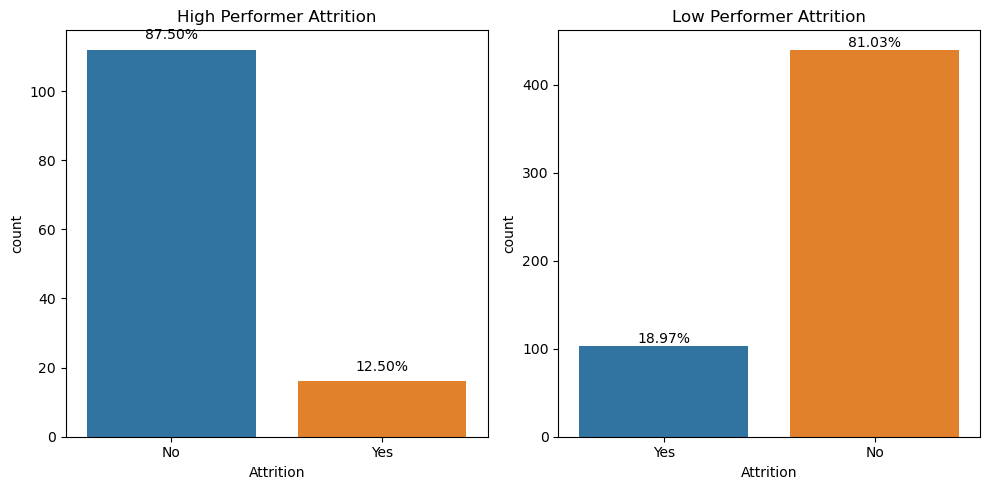

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 고성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=Real_high_performer, x='Attrition', ax=axs[0])
axs[0].set_title('High Performer Attrition')
total_high = len(Real_high_performer)  # 고성능자 집단의 전체 데이터 수
for p in axs[0].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_high), ha="center")

# 저성능자 집단에 대한 막대그래프 및 퍼센트 표시
sns.countplot(data=Real_low_performer, x='Attrition', ax=axs[1])
axs[1].set_title('Low Performer Attrition')
total_low = len(Real_low_performer)  # 저성능자 집단의 전체 데이터 수
for p in axs[1].patches:
    height = p.get_height()  # 막대의 높이 (해당 범주의 데이터 수)
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total_low), ha="center")

plt.tight_layout()
plt.show()

저성과자의 경우, 고성과자보다 퇴사율이 약 6.5% 높은것으로 나타났다.\
이를 통해,
저성과자는 고성과자의 비해 퇴사율이 약 50%가량 높다 라는 결과를 알 수 있었다.

## 결론

본 분석에서는 조직 내 퇴직 결정에 영향을 미치는 다양한 요인들을 조사하였다.  
분석 결과, 퇴사 결정에는 여러 요인이 복합적으로 작용함을 확인하였으며, 그 중에서도 특히 집과의 거리, 업무 성과, 업무 만족도가 중요한 역할을 하는 반면,  
월 소득은 퇴사 결정과 큰 상관관계를 보이지 않는 것으로 나타났다.

#### 1. 집과의 거리
- 집과의 거리가 멀수록 퇴사 확률이 높아지는 것을 확인할 수 있었다. 이는 장거리 통근이 직원의 일상생활과 업무 수행에 부정적인 영향을 미칠 수 있기 때문으로 해석된다.  
또한, 집과의 거리가 멀어질수록 업무환경에 대한 만족도가 낮아지는 경향을 보였다. 이는 장거리 통근이 업무에 대한 인식과 태도에 부정적으로 작용하여 업무 만족도를 저하시킬 수 있음을 알 수 있었다.

#### 2. 월 소득
- 월 소득에 대한 분석에서는 직무 수준, 경력 기간, 회사 내 근무 기간과 같은 요소가 월 소득과 긍정적인 상관관계를 보이는 것으로 나타났다.  
이는 기대할 수 있는 결과로, 직무의 복잡성, 경력의 길이, 회사에 대한 기여도가 높을수록 높은 보상을 받게 됨을 반영한다.  
그러나, 월 소득이 퇴사 결정에 직접적인 영향을 미치지 않는 것으로 나타나, 직원의 퇴직 결정은 단순히 금전적 보상 이상의 요인에 의해 영향을 받는다는 것을 알 수 있었다.

#### 3. 업무환경에 대한 만족도
- 업무환경에 대한 만족도는 직원의 퇴직 의사 결정에 중요한 역할을 한다. 본 분석에서는 대인관계 만족도가 업무환경 만족도에 큰 영향을 미치는 것으로 나타났다.  
이는 조직 내 긍정적인 대인관계가 업무환경에 대한 전반적인 인식을 개선할 수 있음을 시사한다.

#### 4. 업무 성과
- 업무 성과는 퇴사율과 밀접한 관련이 있는 것으로 확인되었다.  
업무 성과가 낮을수록 퇴사율이 높아지는 경향을 보였으며, 이는 성과가 낮은 직원이 업무에 대한 만족감을 느끼지 못하고, 결과적으로 조직을 떠나기로 결정할 확률이 높음을 의미한다

## 2. 엘리트 직원 정의 및 특성 분석

  <H3>회사의 엘리트 직원은 제 역할을 해내고 있는가 ?</H3>

  이런 얘기가 있다.\
  세상은 1%가 전체를 이끈다고

  
  본 과제는 회사의 지속적인 성장을 위해 소위 '엘리트 직원' 혹은 '상위 1% 퍼포머'라 불리는 직원들에 대한 분석을 목적으로 한다.\
  이들의 성과, 업무 수행 능력 여부를 평가하여,\
  회사의 인사 관리 및 발전 전략에 중요한 인사이트를 제공하고자 한다.

### <H4>2.1 엘리트 직원 정의</H4>
  위 과정에서는 엘리트 직원을 아래와 같이 정의하였다

- 근속 연수YearsAtCompany) 3년 이상,
- 교육(Education)의 정도 2 이상 ("석사, 박사") 혹은 경력기간 10년 이상
- 월 급여(MontlyRate)의 수준이 상위 10% 이내
- 스톡옵션 정도(StockOptionLevel)가 높음 (2,3,4)
- 업무의 수준(JobLevel)이 높음 (3,4)

In [20]:
# 엘리트 직원 조건 필터링
# 근속 연수 3년 이상
condition1 = data['YearsAtCompany'] >= 3
# 교육 수준 3 이상, 혹은 경력기간이 10년 이상
condition2 = (data['Education'] >=3)  |  (data['TotalWorkingYears'] >= 10)
# 시간당 급여 상위 10%
hourly_rate_threshold = data['MonthlyIncome'].quantile(0.9)
condition3 = data['MonthlyIncome'] >= hourly_rate_threshold
# 스톡옵션 레벨 2 이상
condition4 = data['StockOptionLevel'] >= 2
# 직무 수준 3 이상
condition5 = data['JobLevel'] >= 3

# 조건을 만족하는 데이터 필터링
elite_employees = data[condition1 & condition2 & condition3 & condition4 & condition5]

elite_employees

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
65,55,No,Travel_Rarely,836,Research & Development,8,2,Medical,4,Female,...,3,3,21,2,3,5,0,0,2,53-57
119,43,No,Travel_Frequently,394,Sales,26,1,Life Sciences,3,Male,...,4,2,25,3,4,25,12,4,12,43-47
279,50,No,Travel_Rarely,797,Research & Development,4,0,Life Sciences,1,Male,...,1,2,28,4,2,10,4,1,6,48-52
280,53,No,Travel_Rarely,1070,Research & Development,3,3,Medical,3,Male,...,4,3,21,5,2,5,3,1,3,53-57
535,41,No,Travel_Rarely,427,Human Resources,10,3,Human Resources,2,Male,...,2,3,23,2,2,21,6,12,6,38-42
746,41,No,Non-Travel,247,Research & Development,7,0,Life Sciences,2,Female,...,2,2,21,3,3,21,16,5,10,38-42
922,44,No,Travel_Rarely,1199,Research & Development,4,1,Life Sciences,3,Male,...,4,2,26,4,2,25,9,14,13,43-47
937,39,No,Travel_Rarely,412,Research & Development,13,3,Medical,3,Female,...,4,2,21,4,3,19,9,15,2,38-42
1010,55,No,Travel_Rarely,1136,Research & Development,1,3,Medical,2,Male,...,4,2,31,4,4,7,7,0,0,53-57
1024,47,No,Travel_Rarely,359,Research & Development,2,3,Medical,1,Female,...,2,2,26,2,4,20,17,5,6,43-47


13명의 자료가 나왔다. (약 1%)


### <H4>2.2 엘리트 직원의 특성 조사</H4>

  조사 기준
- 나이(Age)
- 성별(Gender)
- 월 소득(MonthlyIncome)
- 전공(EducationField)
- 업무 분야
- 업무 종류

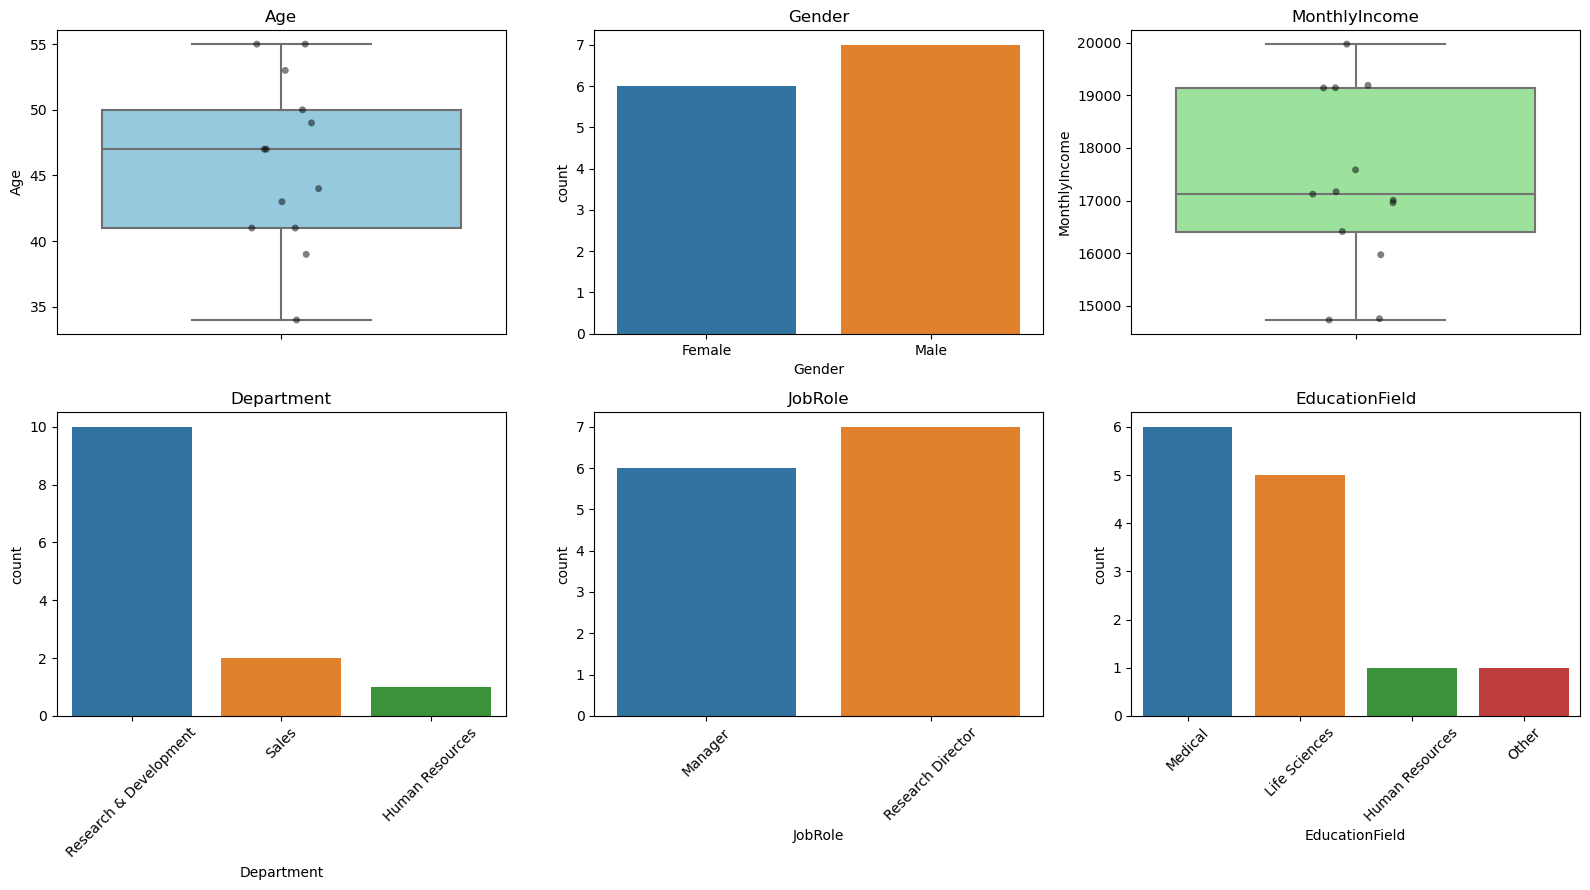

In [21]:
plt.figure(figsize=(16, 9))

# 상단 행: 나이, 성별, 월 소득
plt.subplot(2, 3, 1)
sns.boxplot(data=elite_employees, y='Age', color='skyblue')
sns.stripplot(data=elite_employees, y='Age', color='black', alpha=0.5)
plt.title('Age')

plt.subplot(2, 3, 2)
sns.countplot(data=elite_employees, x='Gender')
plt.title('Gender')

plt.subplot(2, 3, 3)
sns.boxplot(data=elite_employees, y='MonthlyIncome', color='lightgreen')
sns.stripplot(data=elite_employees, y='MonthlyIncome', color='black', alpha=0.5)
plt.title('MonthlyIncome')

# 하단 행: 업무 분야, 업무 종류, 전공
plt.subplot(2, 3, 4)
sns.countplot(data=elite_employees, x='Department')
plt.title('Department')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(data=elite_employees, x='JobRole')
plt.title('JobRole')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.countplot(data=elite_employees, x='EducationField')
plt.title('EducationField')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

연구개발(R&D)부서의 비중이 가장 높게 나왔으며, 그에따라 생명과학 관련 전공을 보유하고 있는 직원들이 대부분임을 알 수 있다.

### 2.3 엘리트 직원 평가
평가 기준\
RealationShip 평가
- 대인관계 만족도(RelationshipSatisfaction)
- 업무 만족도(JobSatisfaction)
- 업무 성과(erformanceRating)

업무 능력 평가
- 급여의 성장률(PercentSalaryHike)
- 마지막 프로모션(YearsSinceLastPromotion)
- 현재 역할의 연수(YearsInCurrentRole)

워라벨 평가
- 일과 생활의 균형정도(WorkLifeBalance)

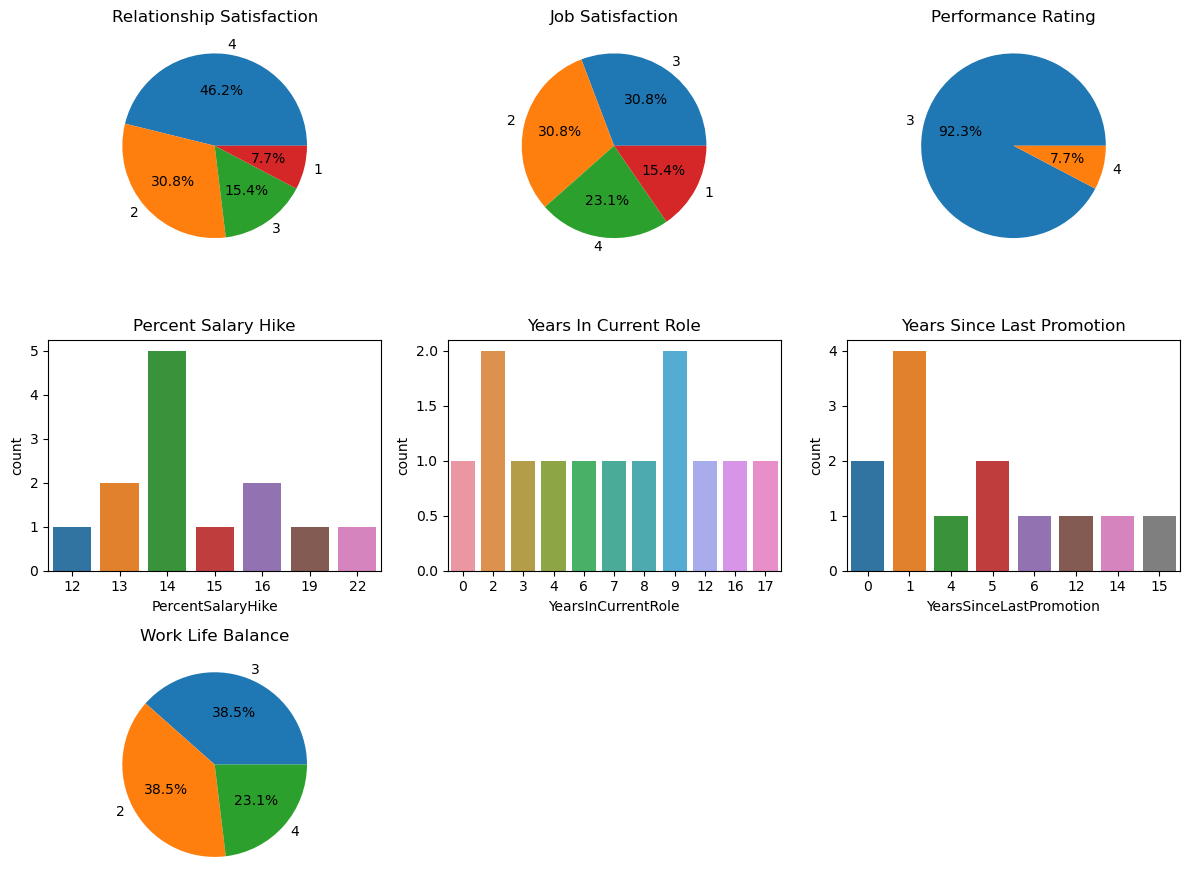

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(12, 9))

# 대인관계 만족도 파이 차트
relationship_satisfaction_counts = elite_employees['RelationshipSatisfaction'].value_counts()
axs[0, 0].pie(relationship_satisfaction_counts, labels=relationship_satisfaction_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Relationship Satisfaction')

# 업무 만족도 파이 차트
job_satisfaction_counts = elite_employees['JobSatisfaction'].value_counts()
axs[0, 1].pie(job_satisfaction_counts, labels=job_satisfaction_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Job Satisfaction')

# 업무 성과 파이 차트
job_performance_counts = elite_employees['PerformanceRating'].value_counts()
axs[0, 2].pie(job_performance_counts, labels=job_performance_counts.index, autopct='%1.1f%%')
axs[0, 2].set_title('Performance Rating')

# 급여의 성장률 바 차트
sns.countplot(data=elite_employees, x='PercentSalaryHike', ax=axs[1, 0])
axs[1, 0].set_title('Percent Salary Hike')

# 현재 역할의 연수 바 차트
sns.countplot(data=elite_employees, x='YearsInCurrentRole', ax=axs[1, 1])
axs[1, 1].set_title('Years In Current Role')

# 마지막 프로모션 바 차트
sns.countplot(data=elite_employees, x='YearsSinceLastPromotion', ax=axs[1, 2])
axs[1, 2].set_title('Years Since Last Promotion')

# 일과 생활의 균형정도 파이 차트 (위치 수정)
work_life_balance_counts = elite_employees['WorkLifeBalance'].value_counts()
axs[2, 0].pie(work_life_balance_counts, labels=work_life_balance_counts.index, autopct='%1.1f%%')
axs[2, 0].set_title('Work Life Balance')

# 불필요한 subplot 공간 숨기기
for i in [1, 2]:
    axs[2, i].axis('off')

plt.tight_layout()
plt.show()

## 결론

종합적으로 볼 때, 엘리트 직원들은 대부분의 평가 항목에서 높은 수준의 만족도와 성과를 보이고 있다.  
그러나, 대인관계 만족도 및 직업 만족도에서 매우 불만족하는 직원의 존재는 주의 깊게 살펴볼 필요가 있어 보인다.  
조직은 이러한 피드백을 바탕으로 개선 방안을 모색하여, 모든 엘리트 직원이 만족할 수 있는 근무 환경을 조성해야 할 것이다.

대인관계 만족도(RelationshipSatisfaction) 및 직업 만족도(JobSatisfaction)

- 대인관계 만족도와 직업 만족도는 모두 매우 높은 수준으로 나타났다.  
이는 엘리트 직원들이 조직 내에서 긍정적인 대인관계를 유지하며, 자신의 직업에 대해 높은 만족감을 느끼고 있음을 의미한다고 볼 수 있다.  
 그러나, 매우 불만족(1)이라고 응답한 직원이 있는것으로 나타났다.

업무 성과(PerformanceRating)

- 업무 성과가 매우 높음(4)인 직원의 비율이 매우 낮다.  
그러나, 이전 분석에서 데이터의 신뢰성에 문제가 있음을 확인하였기 때문에, 업무 성과 평가에 대한 정확한 판단은 어렵다. 

마지막 프로모션(YearsSinceLastPromotio)

- 프로모션 진행 연수가 대체로 적은 것으로 보인다.  
이는 엘리트 직원들이 높은 업무 참여도와 뛰어난 성과를 바탕으로 계속해서 프로젝트에 기여함을 알 수 있다.

연봉 상승률(PercentSalaryHike)

- 연봉 상승률은 전체 직원 평균(15.2%)과 비교하여 대체로 평이한 수준으로 보인다. 

워라밸(WorkLifeBalance)

- 워라밸과 관련하여, 엘리트 직원 중에서 워라밸이 매우 낮음(1)으로 평가한 직원이 없다고 나타났다.   
이는 엘리트 직원들이 업무 부담이 크고 책임감이 높은 자리임에도 불구하고, 조직이 이들의 워라밸을 적절히 관리하고 있음을 알 수 있다..